In [ ]:
!pip install diffusers transformers accelerate safetensors torch torchvision


In [ ]:
import torch
from diffusers import StableDiffusionPipeline

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16 if device == "cuda" else torch.float32
)

pipe = pipe.to(device)


Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


Using device: cuda


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


In [ ]:
import os

dataset_path = "synthetic_dataset"
os.makedirs(dataset_path, exist_ok=True)


In [ ]:
prompts = [
    "A futuristic city at sunset, ultra realistic",
    "A robot playing basketball, cinematic lighting",
    "A peaceful mountain village with snowfall",
    "A cyberpunk street at night with neon lights",
    "A realistic lion sitting on a rock in the jungle"
]

In [ ]:
generated_images = []

for idx, prompt in enumerate(prompts):
    image = pipe(prompt).images[0]

    image_path = os.path.join(dataset_path, f"image_{idx+1}.png")
    image.save(image_path)

    generated_images.append(image)

print("Synthetic dataset generated and saved successfully!")


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Synthetic dataset generated and saved successfully!


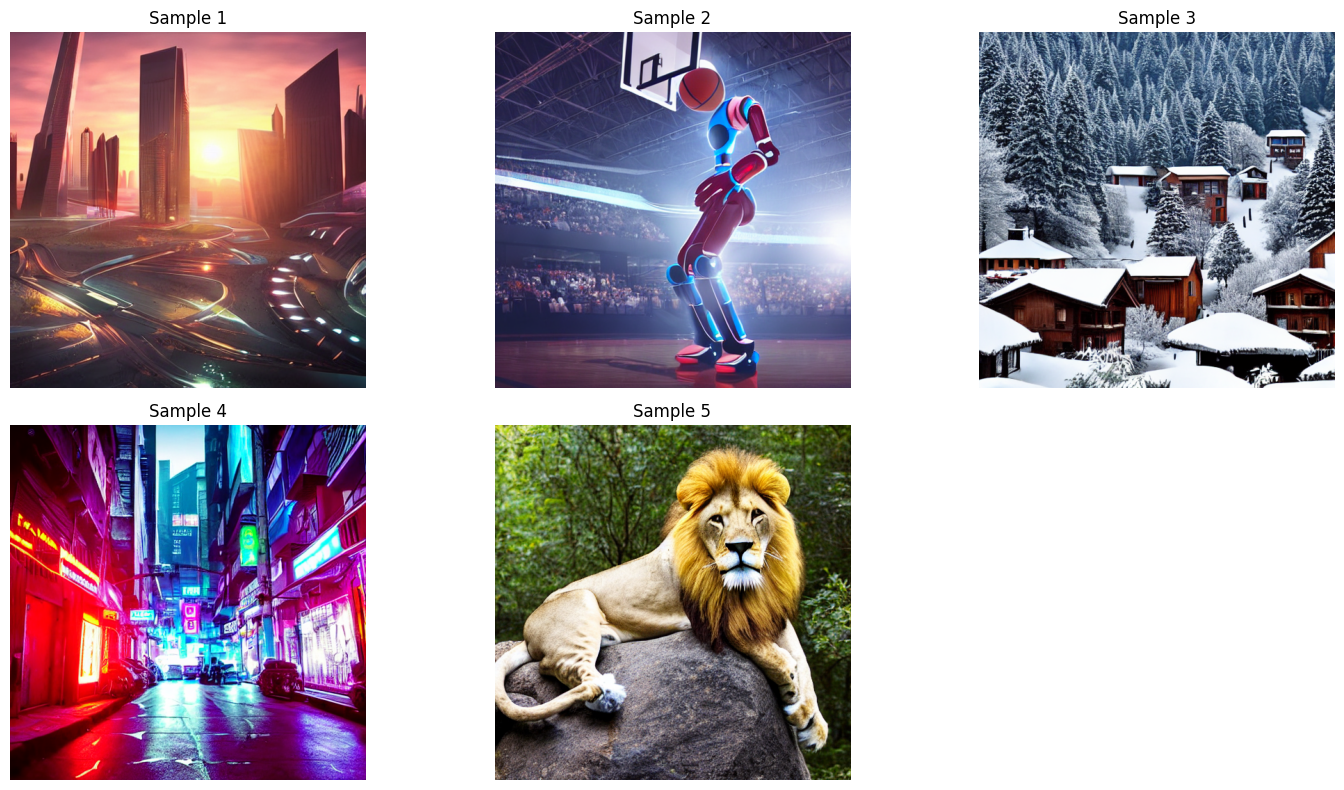

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

for i, img in enumerate(generated_images):
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Sample {i+1}")

plt.tight_layout()
plt.show()


Using device: cuda


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Synthetic X-ray dataset generated successfully


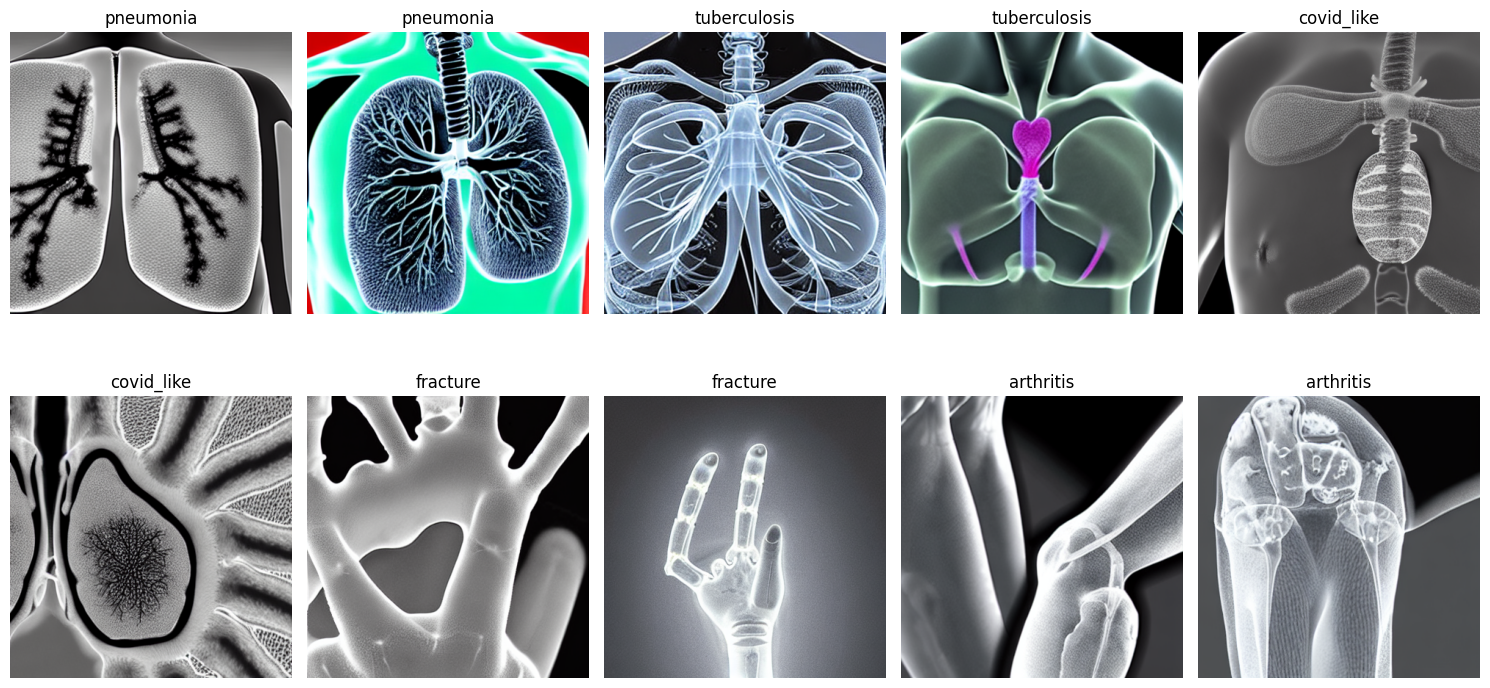

In [ ]:
!pip install diffusers transformers accelerate safetensors torch torchvision matplotlib

import os
import torch
import matplotlib.pyplot as plt
from diffusers import StableDiffusionPipeline

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16 if device == "cuda" else torch.float32
)
pipe = pipe.to(device)

prompts = {
    "pneumonia": "Chest X-ray showing bacterial pneumonia with lung opacities, grayscale radiology image",
    "tuberculosis": "Chest X-ray showing tuberculosis with lung cavitation, realistic medical radiology scan",
    "covid_like": "Chest X-ray showing viral pneumonia with bilateral ground glass opacities, grayscale radiology image",
    "fracture": "Medical X-ray image of a human forearm bone fracture, broken radius and ulna, orthopedic radiology scan, grayscale",
    "arthritis": "Knee X-ray showing osteoarthritis with joint space narrowing, grayscale radiology image"
}

base_path = "synthetic_xray_dataset"
os.makedirs(base_path, exist_ok=True)

for disease in prompts:
    os.makedirs(os.path.join(base_path, disease), exist_ok=True)

images_per_disease = 2
generated_data = []

for disease, prompt in prompts.items():
    for i in range(images_per_disease):
        image = pipe(
            prompt,
            height=384,
            width=384,
            guidance_scale=8,
            num_inference_steps=30
        ).images[0]

        save_path = os.path.join(base_path, disease, f"{disease}_{i+1}.png")
        image.save(save_path)

        generated_data.append((disease, image))

print("Synthetic X-ray dataset generated successfully")

plt.figure(figsize=(15, 8))

for i, (disease, img) in enumerate(generated_data):
    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(disease)
    plt.axis("off")

plt.tight_layout()
plt.show()


Using device: cuda


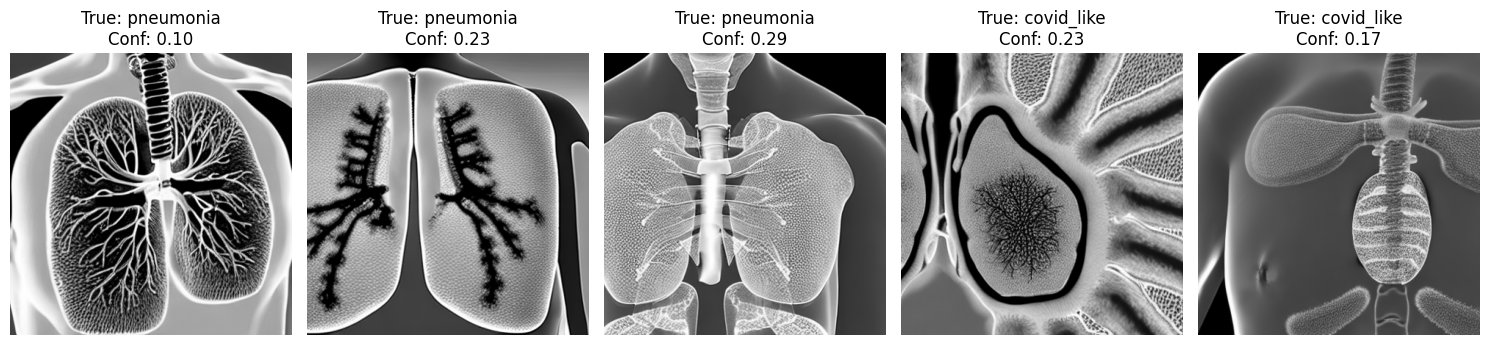

In [ ]:
import os
import torch
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image
import matplotlib.pyplot as plt
import torch.nn.functional as F

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

model = models.densenet121(weights=models.DenseNet121_Weights.DEFAULT)
model.eval()
model = model.to(device)

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

dataset_path = "synthetic_xray_dataset"

images = []
true_labels = []

for disease in os.listdir(dataset_path):
    folder = os.path.join(dataset_path, disease)
    for img_name in os.listdir(folder):
        images.append(os.path.join(folder, img_name))
        true_labels.append(disease)

plt.figure(figsize=(15, 8))

for i, img_path in enumerate(images[:5]):
    img = Image.open(img_path).convert("L")
    input_tensor = transform(img).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(input_tensor)
        probs = F.softmax(outputs, dim=1)
        confidence = torch.max(probs).item()

    plt.subplot(1, 5, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(f"True: {true_labels[i]}\nConf: {confidence:.2f}")
    plt.axis("off")

plt.tight_layout()
plt.show()
